In [1]:
from PIL import Image
import urllib.request

In [2]:
img = Image.open(urllib.request.urlopen('https://github.com/thinkpiece/kait_conv_test/raw/master/assets/lenna.png'))

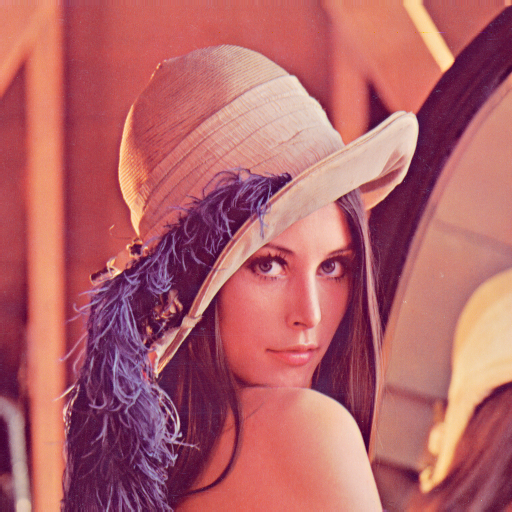

In [3]:
img

In [4]:
import torch, torchvision
from torchvision import transforms
from torch import nn

In [5]:
to_tensor = transforms.Compose([
   transforms.Grayscale(),  # Convert image to grayscale.
   transforms.ToTensor()    # Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0].
])

to_pil = transforms.Compose([
    transforms.ToPILImage()
])

In [6]:
input = to_tensor(img)

In [7]:
input.shape

torch.Size([1, 512, 512])

In [8]:
input

tensor([[[0.6353, 0.6353, 0.6353,  ..., 0.6667, 0.6078, 0.5020],
         [0.6353, 0.6353, 0.6353,  ..., 0.6667, 0.6078, 0.5020],
         [0.6353, 0.6353, 0.6353,  ..., 0.6667, 0.6078, 0.5020],
         ...,
         [0.1686, 0.1686, 0.1961,  ..., 0.4078, 0.3922, 0.3843],
         [0.1725, 0.1725, 0.2157,  ..., 0.4078, 0.4118, 0.4235],
         [0.1725, 0.1725, 0.2157,  ..., 0.4078, 0.4118, 0.4235]]])

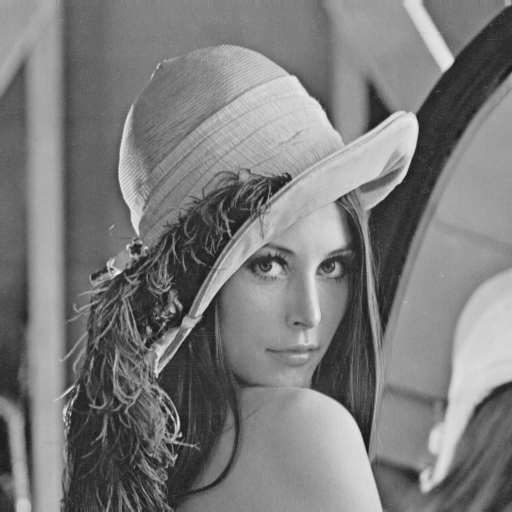

In [9]:
to_pil(input)

2D convolution over an input image:

+ `in_channels = 1`: an input is a grayscale image
+ `out_channels = 1`: an output is a grayscale image
+ `kernel_size = (3, 3)`: the kernel (filter) size is 3 x 3
+ `stride = 1`: the stride for the cross-correlation is 1
+ `padding = 1`: zero-paddings on both sides for 1 point for each dimension
+ `bias = False`: no bias parameter (for simplicity)

In [10]:
conv = nn.Conv2d(1, 1, (3, 3), stride=1, padding=1, bias=False)

In [11]:
input = input.unsqueeze(0)

In [12]:
input.shape

torch.Size([1, 1, 512, 512])

In [13]:
output = conv(input)

In [14]:
output.shape

torch.Size([1, 1, 512, 512])

In [15]:
output.data.squeeze(dim=0).shape

torch.Size([1, 512, 512])

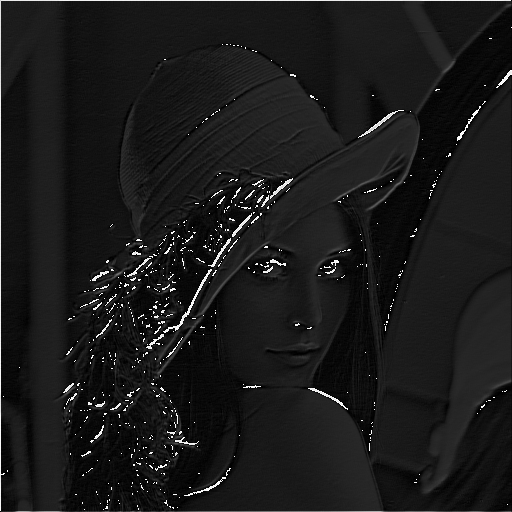

In [16]:
to_pil(output.data.squeeze(dim=0))

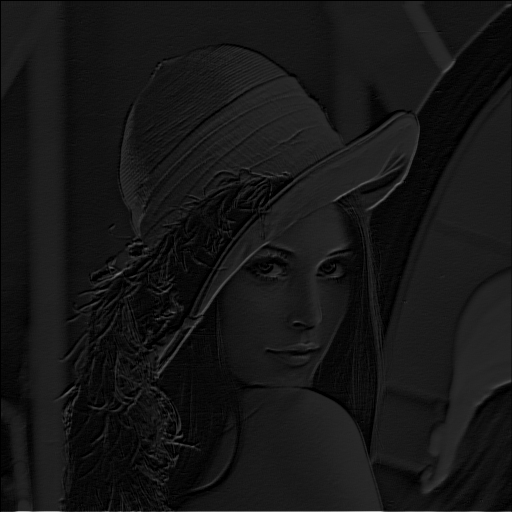

In [17]:
to_pil(torch.clamp(output, 0, 1).data.squeeze(dim=0))

In [18]:
# utility function to show two images in a row
def display(img1, img2):
    im1 = to_pil(torch.clamp(img1, 0, 1).data.squeeze(dim=0))
    im2 = to_pil(torch.clamp(img2, 0, 1).data.squeeze(dim=0))
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

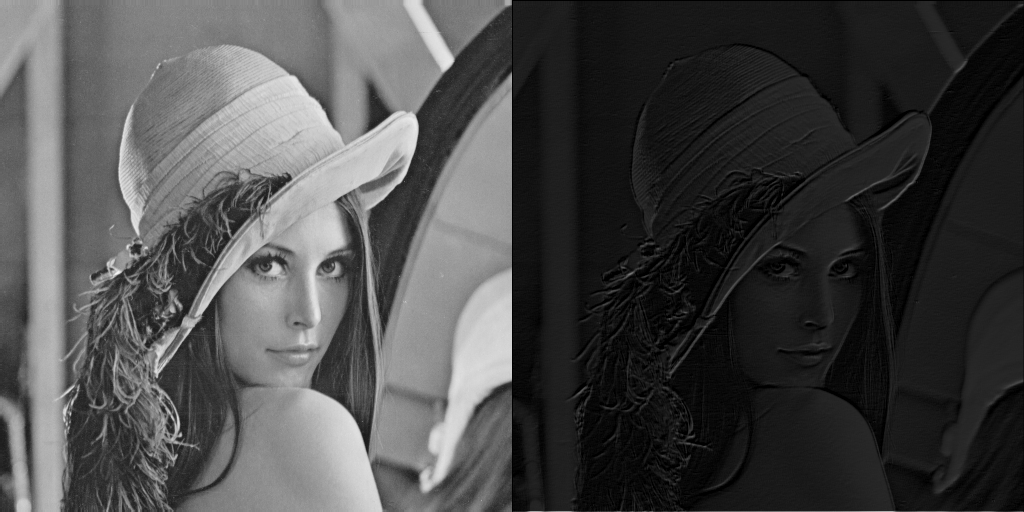

In [19]:
display(input, output)

In [20]:
conv.weight.data

tensor([[[[ 0.2163, -0.1263,  0.2186],
          [ 0.2568,  0.1103,  0.1576],
          [-0.1012, -0.2457, -0.3070]]]])

In [21]:
conv.weight.shape

torch.Size([1, 1, 3, 3])

In [22]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1, 0.],
    [0., 0., 0.],
]]])

In [23]:
conv.weight.data

tensor([[[[0., 0., 0.],
          [0., 1., 0.],
          [0., 0., 0.]]]])

In [24]:
output = conv(input)

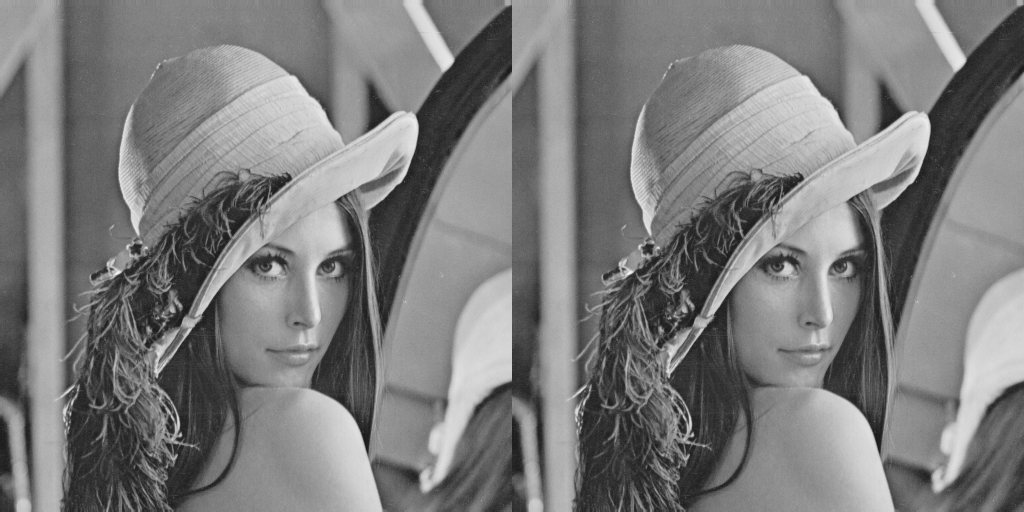

In [25]:
display(input, output)

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 1.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


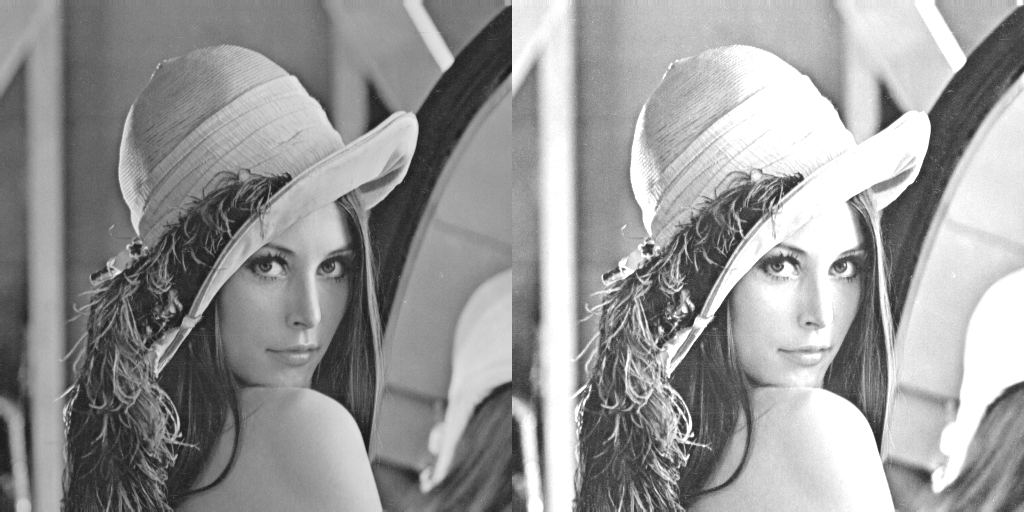

In [26]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 1.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.5000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]])


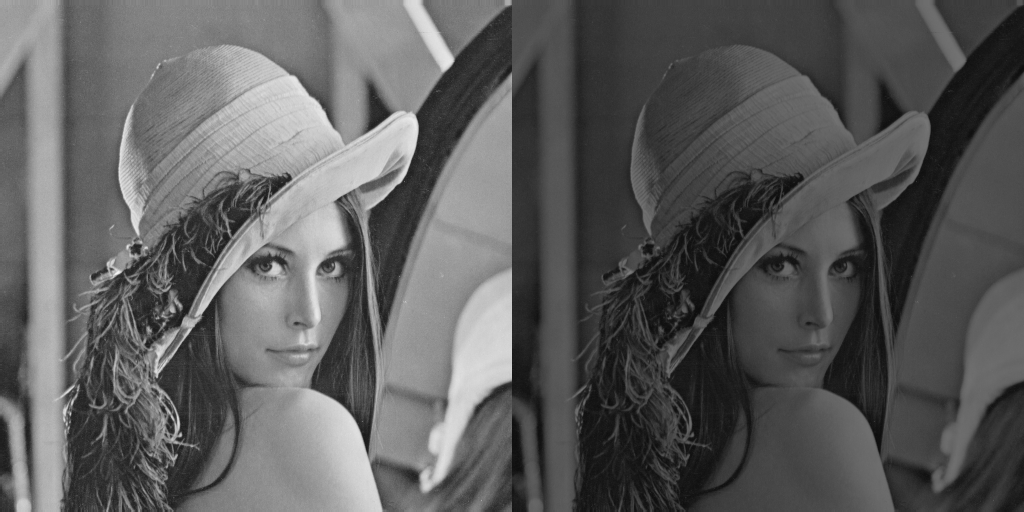

In [27]:
conv.weight.data = torch.tensor([[[
    [0., 0., 0.],
    [0., 0.5, 0.],
    [0., 0., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]])


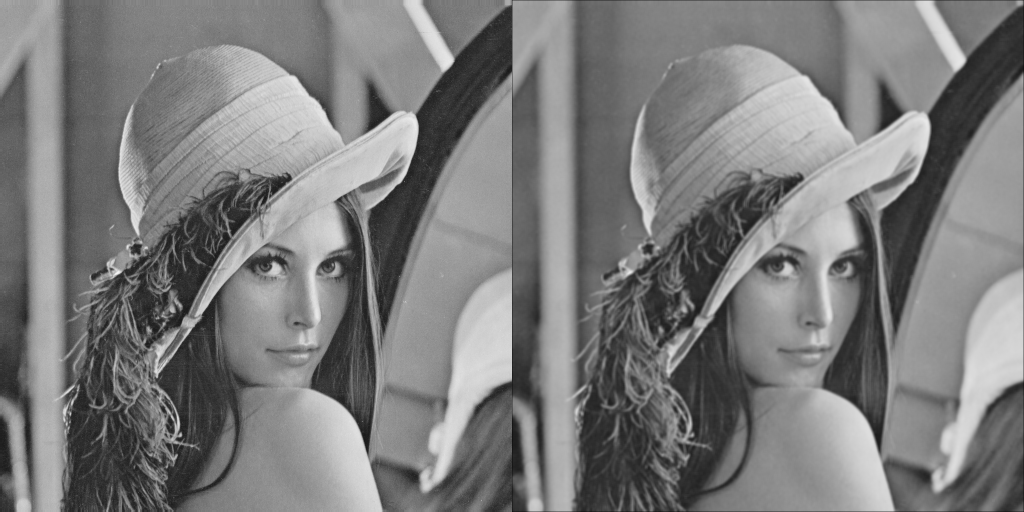

In [28]:
conv.weight.data = torch.ones((1, 1, 3,3), dtype=torch.float) / 9.
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[0.0625, 0.1250, 0.0625],
          [0.1250, 0.2500, 0.1250],
          [0.0625, 0.1250, 0.0625]]]])


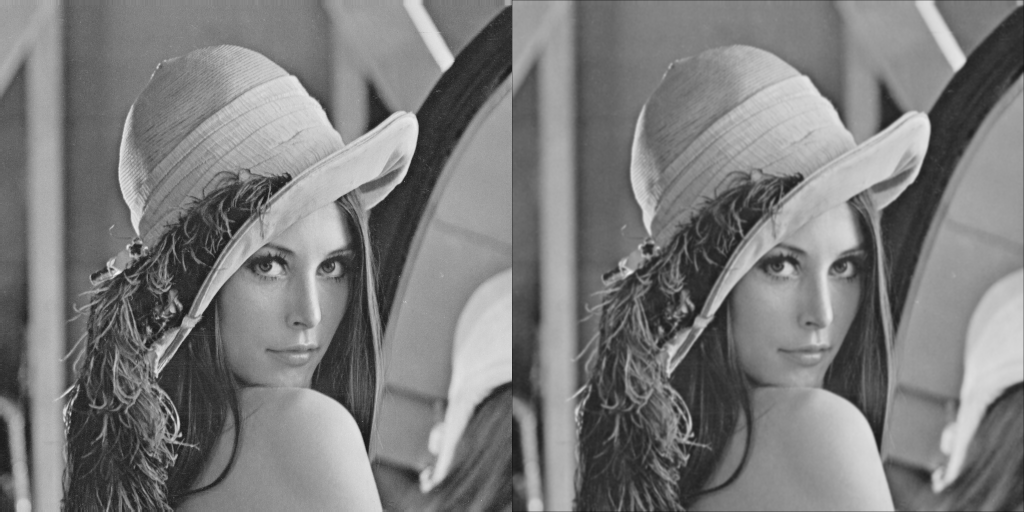

In [29]:
conv.weight.data = torch.tensor([[[
    [1., 2., 1.],
    [2., 4., 2.],
    [1., 2., 1.],
]]])/16.
print(conv.weight.data)
output = conv(input)
display(input, output)

tensor([[[[ 0., -1.,  0.],
          [-1.,  5., -1.],
          [ 0., -1.,  0.]]]])


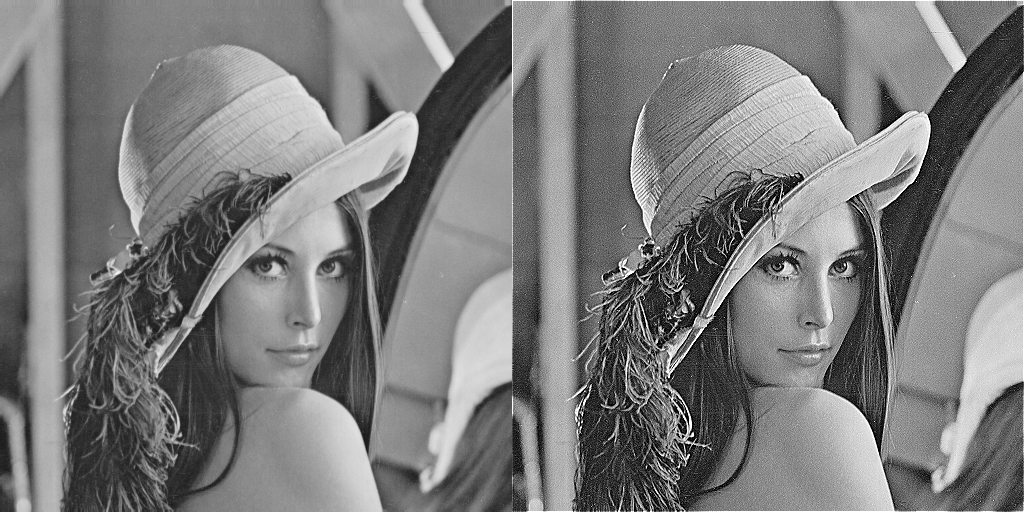

In [30]:
conv.weight.data = torch.tensor([[[
    [0., -1., 0.],
    [-1., 5., -1.],
    [0., -1., 0.],
]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### How to do 'Edge Detection' with Convolution Weights?

In [ ]:
#conv.weight.data = torch.tensor([[[
#    [0., -1., 0.],
#    [-1., 5., -1.],
#    [0., -1., 0.],
#]]])
print(conv.weight.data)
output = conv(input)
display(input, output)

### Now make your own Convolution! (just for academic purpose)

In [31]:
def diy_conv(input_map, weight):    
    input_map_height = input_map.size()[2]
    input_map_width  = input_map.size()[3]

    output_map = torch.zeros(1, 1, input_map_height, input_map_width)

    for y in range(input_map_height):
        for x in range(input_map_width):
            output_map[0,0,y,x] = input_map[0,0,y,x]
    
    return output_map

In [32]:
output = diy_conv(input, conv.weight.data)

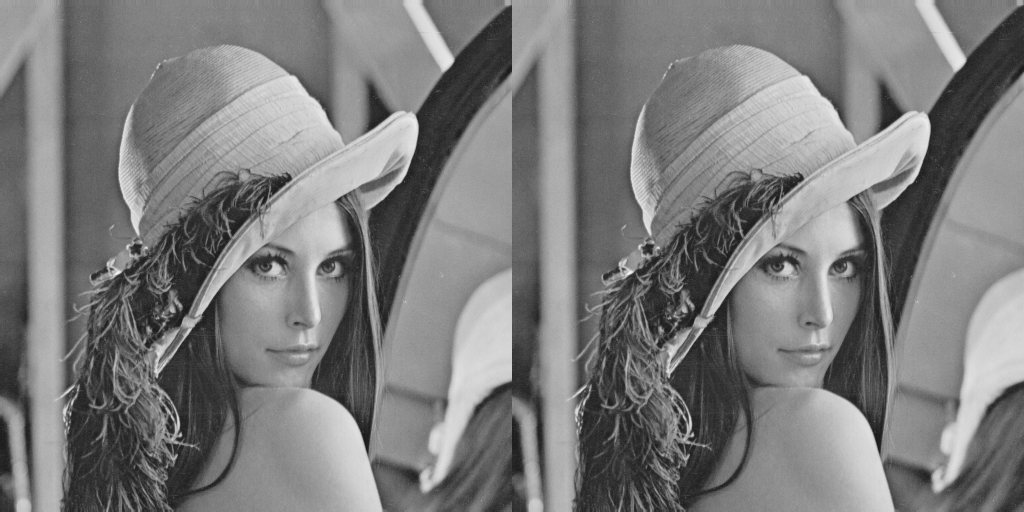

In [33]:
display(input, output)